1 Training an Artificial Neural Network

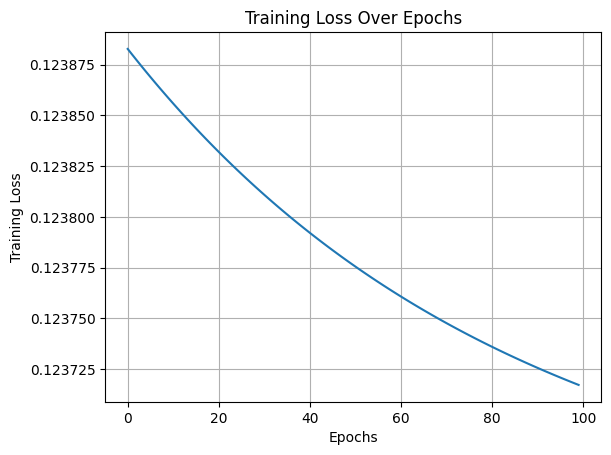

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data_Q1.csv")

# Convert columns to NumPy arrays
training_x1 = df["x1"].to_numpy()
training_x2 = df["x2"].to_numpy()
training_y = df["y"].to_numpy()
N = len(training_x1)  # Number of data points

# Create the training_x array with a bias term
training_x = np.array([[x1, x2, 1] for x1, x2 in zip(training_x1, training_x2)])

# Set random seed for reproducibility
np.random.seed(123)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the gradient of the sigmoid function
def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weight matrices
weights1 = np.random.uniform(-1, 1, (3, 3))  # Input to hidden layer
weights2 = np.random.uniform(-1, 1, (4, 1))  # Hidden to output layer

# Initialize hyperparameters
learning_rate = 0.05
total_epochs = 100

# Initialize array to store training errors
training_error = []

# Training loop
for epoch in range(total_epochs):
    # Forward pass
    X = training_x
    H = X @ weights1  # Hidden layer pre-activation
    Z = sigmoid(H)  # Hidden layer activation
    Z = np.hstack((Z, np.ones((N, 1))))  # Append bias to hidden layer
    O = Z @ weights2  # Output layer pre-activation
    y_hat = sigmoid(O)  # Output layer activation (prediction)

    # Compute loss (Mean Squared Error)
    loss = (1 / (2 * N)) * np.sum((training_y.reshape(-1, 1) - y_hat) ** 2)
    training_error.append(loss)

    # Backpropagation
    temp2 = -(training_y.reshape(-1, 1) - y_hat) * grad_sigmoid(O)  # Output error term
    gradient2 = Z.T @ temp2 / N  # Gradient for weights2

    temp1 = temp2 @ weights2[:-1].T * grad_sigmoid(H)  # Hidden layer error term
    gradient1 = X.T @ temp1 / N  # Gradient for weights1

    # Gradient descent update
    weights2 -= learning_rate * gradient2
    weights1 -= learning_rate * gradient1

# Plot training loss
plt.plot(range(total_epochs), training_error)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

2 Classification using the k-Nearest Neighbors Technique

Predicted Age (Rings) for new abalone: 11
Mean Squared Error (MSE) with k=3: 8.003189792663477


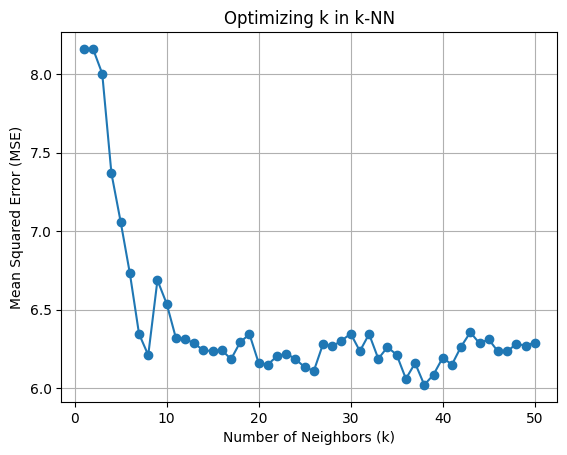

Optimal k: 38
Minimum MSE: 6.021531100478469


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None)
column_names = [
    "Sex", "Length", "Diameter", "Height", "WholeWeight",
    "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]

# Load dataset with column names
abalone = pd.read_csv(url, header=None, names=column_names)

# Remove 'Sex' column as it does not influence age
abalone = abalone.drop(columns=["Sex"])

X = abalone.drop(columns=["Rings"]).values
y = abalone["Rings"].values

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

# New abalone sample
new_abalone = np.array([[0.569552, 0.446407, 0.154437, 1.016849, 0.430051, 0.222526, 0.291208]])

# Compute Euclidean distances from new_abalone to all points in X_train
distances = np.linalg.norm(X_train - new_abalone, axis=1)

# Get indices of the 3 nearest neighbors
k = 3
nearest_indices = np.argsort(distances)[:k]  # Get the indices of k smallest distances

# Extract ages (Rings) of nearest neighbors and predict the new abalone’s age
nearest_ages = y_train[nearest_indices]  # Get the corresponding ages
predicted_age = Counter(nearest_ages).most_common(1)[0][0]  # Mode (most frequent age)

print(f"Predicted Age (Rings) for new abalone: {predicted_age}")

# Predict ages for all X_test samples
predicted_ages_test = []
for test_sample in X_test:
    distances = np.linalg.norm(X_train - test_sample, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_ages = y_train[nearest_indices]
    predicted_age = Counter(nearest_ages).most_common(1)[0][0]  # Mode
    predicted_ages_test.append(predicted_age)

predicted_ages_test = np.array(predicted_ages_test)

# Compute Mean Squared Error (MSE)
mse = np.mean((predicted_ages_test - y_test) ** 2)
print(f"Mean Squared Error (MSE) with k={k}: {mse}")

mse_values = []

# Try different k values
k_values = range(1, 51)
for k in k_values:
    predicted_ages_test = []

    for test_sample in X_test:
        distances = np.linalg.norm(X_train - test_sample, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_ages = y_train[nearest_indices]
        predicted_age = Counter(nearest_ages).most_common(1)[0][0]  # Mode
        predicted_ages_test.append(predicted_age)

    predicted_ages_test = np.array(predicted_ages_test)
    mse = np.mean((predicted_ages_test - y_test) ** 2)
    mse_values.append(mse)

# Plot MSE vs k
#plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Optimizing k in k-NN")
plt.grid(True)
plt.show()

# Find optimal k (minimum MSE)
optimal_k = k_values[np.argmin(mse_values)]
optimal_mse = min(mse_values)

print(f"Optimal k: {optimal_k}")
print(f"Minimum MSE: {optimal_mse}")

